В цьому наборі завдань закріпимо те, що було на лекції з Computer Vision.

# Computer Vision with PyTorch Excercises. Solution


## 1. Наведіть 3 галузі промисловості, де комп'ютерний зір використовується сьогодні (можна згадати з лекції, або провести міні-рісерч).

1. На промислових заводах в логістичному відділі, коли грузять товар або якість деталі. В такому випадку камера може аналізувати
палети з продукцією і перевіряти, чи все заявлене в замовленні йде на відправку.
2. Сфера безпеки роботи на підприємствах, коли камери аналізують працівників, аби ті були у захисних рукавицях, касці та чоботах.
3. Агропромисловість, де можна перевіряти поля та дивитися, де можна б було зібрати врожай, а де полити.

## 2. Виділіть 20 хвилин аби ознайомитись та переглянути сайт [CNN Explainer](https://poloclub.github.io/cnn-explainer/).

* Завантажте власне будь-яке зображення за допомогою кнопки Upload" на сайті та подивіться, що відбувається на кожному шарі CNN, коли ваше зображення проходить через нього.

Напишіть 3 пункти, що ви дізнались після цієї вправи?

1. CNN використовує фільтри, які ковзають по зображенню й витягують локальні ознаки, створюючи активаційні карти.
2. Через ReLU та pooling мережа поступово зменшує розмір даних і виділяє все важливіші та абстрактніші ознаки.
3. Після «розплющення» ознак фінальний шар із softmax перетворює їх на ймовірності класів для класифікації. Це дає нам прогноз того, що саме система бачить на фото.

## 3. Завантажте навчальні та тестові набори даних [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST).

MNIST - базовий набір даних для задач Computer Vision. Часто використовується для навчання.

- Виведіть, скільки елементів в кожному наборі.
- Покажіть формат (розмірності) кожної картинки.
- Виведіть, які класи представлені в цьому наборі даних.

In [35]:
from torchvision import datasets, transforms

# Transform images to tensors
transform = transforms.ToTensor()

# Load MNIST train and test datasets
train_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)

# Print number of samples
print("Number of images in train set:", len(train_data))
print("Number of images in test set:", len(test_data))

# Check the shape of 1 image
image, label = train_data[0]
print("Image shape:", image.shape)

# Print all classes
print("Classes:", train_data.classes)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 507kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.67MB/s]

Number of images in train set: 60000
Number of images in test set: 10000
Image shape: torch.Size([1, 28, 28])
Classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


## 4. Візуалізуйте щонайменше 5 різних зразків з навчального набору даних MNIST.

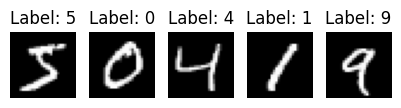

In [39]:
import matplotlib.pyplot as plt


transform = transforms.ToTensor()
train_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
plt.figure(figsize=(10, 2))

for i in range(5):
    image, label = train_data[i]
    image = image.squeeze().numpy()

    plt.subplot(1, 10, i+1)
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")

plt.show()

## 5. Перетворіть навчальні та тестові набори даних MNIST у data loaders за допомогою `torch.utils.data.DataLoader`, встановіть `batch_size=32`.
- Покажіть, яку форму даних вертають дата лоадери.

In [41]:
import torch
from torch.utils.data import DataLoader


transform = transforms.ToTensor()
train_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)


train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=32, shuffle=False)


images, labels = next(iter(train_loader))

print("Batch images shape:", images.shape)
print("Batch labels shape:", labels.shape)

Batch images shape: torch.Size([32, 1, 28, 28])
Batch labels shape: torch.Size([32])


## 6. Відтворіть `ModelV2`, яку ми розглядали на лекції
Це до слова та сама модель з [сайту CNN Explainer](https://poloclub.github.io/cnn-explainer/), також відома як TinyVGG і вона здатна навчатися на наборі даних MNIST.

Напишіть клас моделі.

In [42]:
import torch
from torch import nn

class MNISTModelV2(nn.Module):
    """
    TinyVGG-style CNN architecture for MNIST.
    Based on: https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_channels: int, hidden_units: int, output_shape: int):
        super().__init__()


        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_channels,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )


        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )


        self.classifier = nn.Sequential(
            nn.Flatten(),

            nn.Linear(in_features=hidden_units * 7 * 7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

In [43]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model_2 = MNISTModelV2(input_channels=1, hidden_units=10, output_shape=10).to(device)
model_2

MNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 7. Навчіть модель, яку ви побудували в попередній вправі, протягом 5 епох на CPU та GPU і подивіться, скільки часу це займе в кожному з варіантів.

In [45]:
import time
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


devices = ["cpu"]
if torch.cuda.is_available():
    devices.append("cuda")

print("Available devices:", devices)
transform = transforms.ToTensor()
train_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)

batch_size = 32
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)


num_epochs = 5
input_channels = 1
hidden_units = 10
output_shape = 10


def train_on_device(device: str):
    print(f"\n Training on {device.upper()}")

    model = MNISTModelV2(
        input_channels=input_channels,
        hidden_units=hidden_units,
        output_shape=output_shape
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0.0

        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            y_pred = model(images)
            loss = loss_fn(y_pred, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}] | Avg train loss: {epoch_loss / len(train_loader):.4f}")

    total_time = time.time() - start_time
    print(f"Total training time on {device.upper()}: {total_time:.2f} seconds")

    return model, total_time



times = {}
trained_models = {}

for dev in devices:
    model, train_time = train_on_device(dev)
    trained_models[dev] = model
    times[dev] = train_time


print("\n Summary ")
for dev, t in times.items():
    print(f"{dev.upper()}: {t:.2f} seconds")

# GPU model remains on CUDA:
gpu_model = trained_models.get("cuda", None)
if gpu_model is not None:
    print("GPU model is stored on:", next(gpu_model.parameters()).device)

Available devices: ['cpu', 'cuda']

 Training on CPU
Epoch [1/5] | Avg train loss: 0.2362
Epoch [2/5] | Avg train loss: 0.0734
Epoch [3/5] | Avg train loss: 0.0559
Epoch [4/5] | Avg train loss: 0.0467
Epoch [5/5] | Avg train loss: 0.0409
Total training time on CPU: 193.31 seconds

 Training on CUDA
Epoch [1/5] | Avg train loss: 0.2203
Epoch [2/5] | Avg train loss: 0.0761
Epoch [3/5] | Avg train loss: 0.0558
Epoch [4/5] | Avg train loss: 0.0467
Epoch [5/5] | Avg train loss: 0.0397
Total training time on CUDA: 54.60 seconds

 Summary 
CPU: 193.31 seconds
CUDA: 54.60 seconds
GPU model is stored on: cuda:0


## 8. Зробіть прогнози за допомогою вашої навченої моделі та візуалізуйте принаймні 5 з них, порівнюючи прогноз з цільовою міткою.

Using device for inference: cuda:0


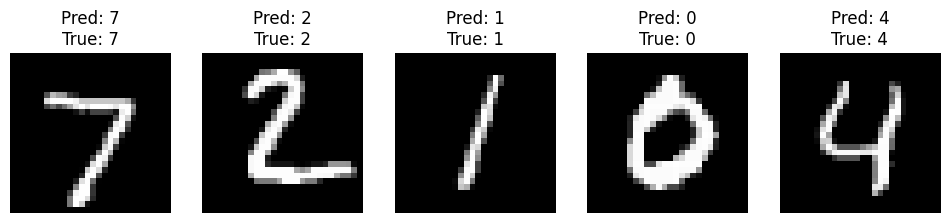

In [46]:
model = trained_models.get("cuda", trained_models.get("cpu"))
device = next(model.parameters()).device
print("Using device for inference:", device)


model.eval()


samples = []
for i in range(5):
    image, label = test_data[i]
    samples.append((image, label))


plt.figure(figsize=(12, 3))

for idx, (image, label) in enumerate(samples):

    img = image.unsqueeze(0).to(device)
    with torch.inference_mode():
        pred_logits = model(img)
        pred_label = torch.argmax(pred_logits, dim=1).item()


    img_np = image.squeeze().numpy()


    plt.subplot(1, 5, idx + 1)
    plt.imshow(img_np, cmap="gray")
    plt.title(f"Pred: {pred_label}\nTrue: {label}")
    plt.axis("off")

plt.show()

In [47]:
model = trained_models.get("cuda", trained_models.get("cpu"))
device = next(model.parameters()).device
print("Evaluating on device:", device)


model.eval()

correct = 0
total = 0


with torch.inference_mode():
    for images, labels in test_loader:

        images = images.to(device)
        labels = labels.to(device)


        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()


accuracy = correct / total * 100
print(f"Test Accuracy: {accuracy:.2f}%")

Evaluating on device: cuda:0
Test Accuracy: 98.80%


## 9. Побудуйте матрицю плутанини, порівнюючи передбачення вашої моделі з істинними мітками.

Using device for confusion matrix: cuda:0


<Figure size 800x800 with 0 Axes>

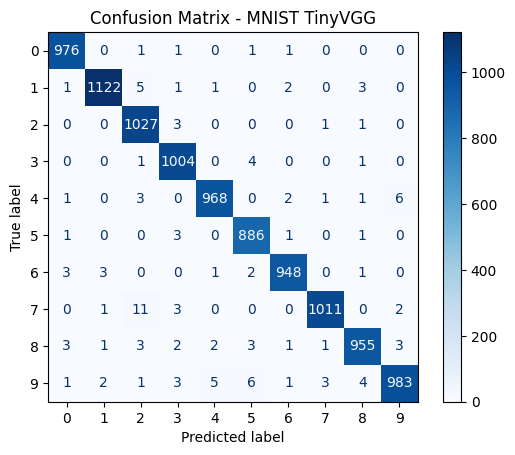

In [48]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


model = trained_models.get("cuda", trained_models.get("cpu"))
device = next(model.parameters()).device
print("Using device for confusion matrix:", device)

model.eval()

all_preds = []
all_labels = []


with torch.inference_mode():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(10)))

plt.figure(figsize=(8, 8))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - MNIST TinyVGG")
plt.show()

## 10. Виведіть принаймні 9 прикладів, де модель помиляється, разом з тим, якою мала бути мітка зображення.
* Після візуалізації цих прогнозів, як ви думаєте, це більше помилка моделювання чи помилка даних?
* Тобто, чи може модель працювати краще, чи мітки даних занадто близькі одна до одної, що навіть людина не може чітко розрізнити що це за цифра?

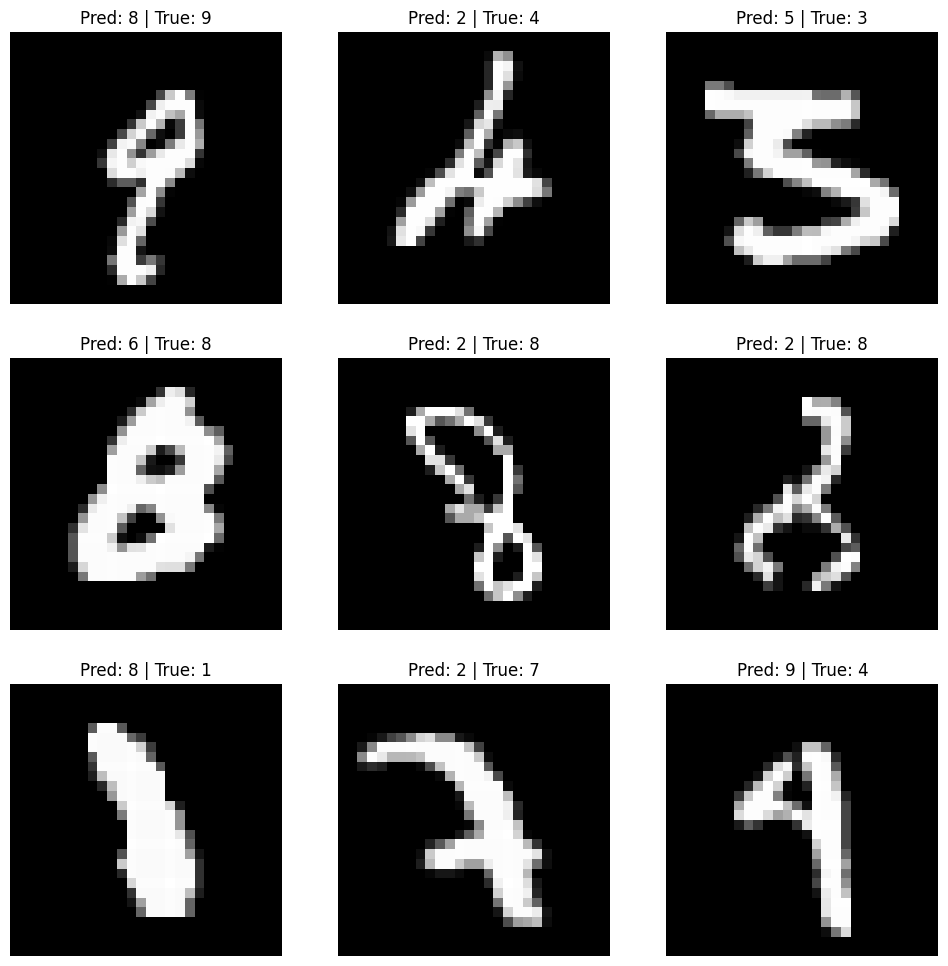

In [49]:
import matplotlib.pyplot as plt
import torch


model = trained_models.get("cuda", trained_models.get("cpu"))
device = next(model.parameters()).device

model.eval()

wrong_images = []
wrong_preds = []
wrong_labels = []


with torch.inference_mode():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, 1)

        incorrect = preds != labels

        for img, pred, true in zip(images[incorrect], preds[incorrect], labels[incorrect]):
            wrong_images.append(img.cpu())
            wrong_preds.append(pred.item())
            wrong_labels.append(true.item())


        if len(wrong_images) >= 9:
            break


plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(wrong_images[i].squeeze(), cmap="gray")
    plt.title(f"Pred: {wrong_preds[i]} | True: {wrong_labels[i]}")
    plt.axis("off")

plt.show()

Спостереження: на мою думку помилка у даних. Якщо у людини виникають складності з вірною відповіддю, то й модель не зможе робити вірний прогноз. Напевно, коли модель натренується на більшому сеті, то є шанси у таких випадках теж давати вірні результати.

## 11. Створіть випадковий тензор форми `[1, 3, 64, 64]` і пропустіть його через шар `nn.Conv2d()` з різними налаштуваннями гіперпараметрів (ви можете вибрати будь-які налаштування), що ви помічаєте, якщо параметр `kernel_size` збільшується або зменшується?

In [50]:
import torch
from torch import nn


x = torch.randn(1, 3, 64, 64)

print("Input shape:", x.shape)


kernel_sizes = [1, 3, 5, 7, 9]

for k in kernel_sizes:
    conv = nn.Conv2d(in_channels=3,
                     out_channels=8,
                     kernel_size=k,
                     stride=1,
                     padding=0)

    out = conv(x)
    print(f"Kernel size = {k} -> Output shape: {out.shape}")

Input shape: torch.Size([1, 3, 64, 64])
Kernel size = 1 -> Output shape: torch.Size([1, 8, 64, 64])
Kernel size = 3 -> Output shape: torch.Size([1, 8, 62, 62])
Kernel size = 5 -> Output shape: torch.Size([1, 8, 60, 60])
Kernel size = 7 -> Output shape: torch.Size([1, 8, 58, 58])
Kernel size = 9 -> Output shape: torch.Size([1, 8, 56, 56])


Спостереження:

Зі збільшенням параметра kernel_size розмірності вихідного тензора зменшуються. Причина - ядро покриває більшу область вхідного зображення за один крок, вимагаючи менше кроків для проходження цілого зображення.